# Get data into data array and print descriptives

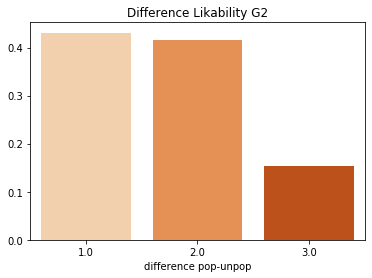

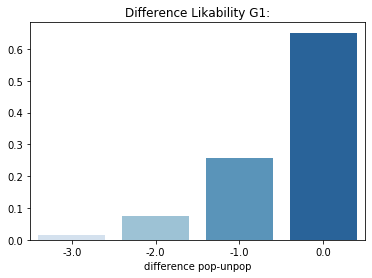

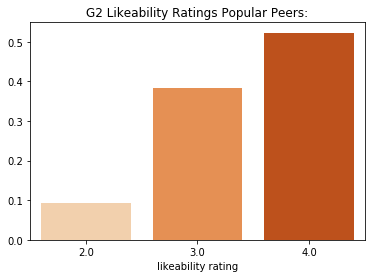

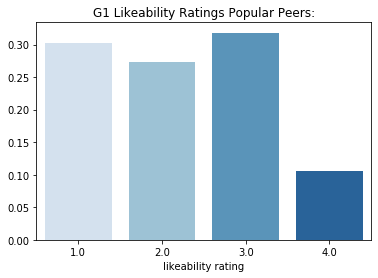

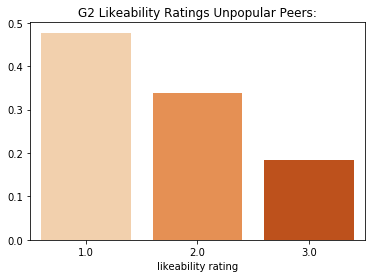

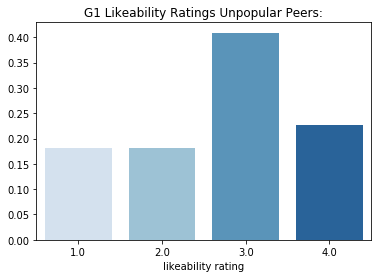

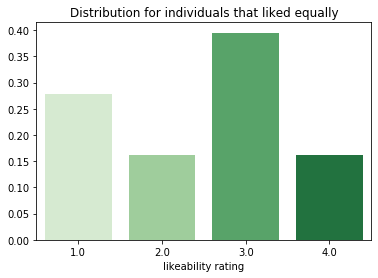

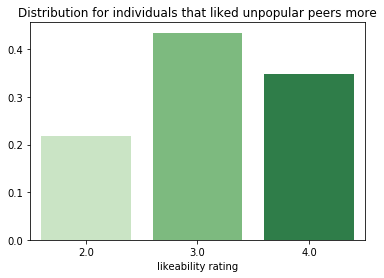

In [17]:
import pandas as pd
import numpy as np
from scipy import stats
import matplotlib.pyplot as plt
import os 
import csv
from scipy.stats import spearmanr as corrS
from scipy.stats import ttest_ind
import seaborn as sns
import matplotlib.pyplot as plt

path_files='/Users/paulsharp/Documents/Eva_Telzer_Collaboration/social_planets_data'
csvfiles=[x for x in os.listdir(os.curdir) if x.endswith('-.csv')]


unpop_lik=[]
own_rating=[]
unpop_cool=[]
pop_lik=[]
pop_cool=[]
combo_pop=[]
combo_unpop=[]
acceptable=[1,2,3,4]
subs_ttp=[]
soc_stat_df=pd.read_csv('sub_soc_stats_socialpref.csv')
counter=-1

#iterate through csv files that has self-report data
for sub in csvfiles:
    counter+=1
    df=pd.read_csv(sub)
    name_rounds=df.Procedure
    likability=df['PostScan4.RESP']
    cool=df['PostScan2.RESP']
    row=0
    for q_name in name_rounds:
        if likability[row] in acceptable:
            if q_name.endswith('Unpop'):
                unpop_lik.append(likability[row])
            else:
                pop_lik.append(likability[row])
        if cool[row] in acceptable:
            if q_name.endswith('Unpop'):
                unpop_cool.append(cool[row])
            else:
                pop_cool.append(cool[row])
        if cool[row] in acceptable and likability[row] in acceptable:
            if q_name.endswith('Unpop'):
                combo_unpop.append((likability[row]+cool[row])/2.0)
            else:
                combo_pop.append((likability[row]+cool[row])/2.0)
        row+=1

                

#convert se;f report data to arrays  
up_liks=np.asarray(unpop_lik)
p_liks=np.asarray(pop_lik)

#create array of differences within subjects for which peer type is liked more (or equally)
difference_liks=p_liks-up_liks


#compute subgroups within differences array just computed
# G1 - composed of one subgroup that likes unpopular peers more & one subgroup that likes both equally
# G2 - composed of participants that like popular peers mroe

num_negative=0
num_equal=0
equal_vals=[]
negative_vals=[]
positive_vals=[]
counter=-1
positive_subs=[['G2_popMore']]
equal_subs=[['G1_equal']]
neg_subs=[['G1_unpopMore']]
likeable_subs_no_equals=[]
likeable_subs_no_negs=[]
for i in difference_liks:
    counter+=1
    if i<0:
        num_negative+=1
        negative_vals.append(unpop_lik[counter])
        likeable_subs_no_equals.append(0)
        neg_subs.append([csvfiles[counter]])
    elif i==0:
        num_equal+=1
        likeable_subs_no_negs.append(0)
        equal_vals.append(unpop_lik[counter])
        equal_subs.append([csvfiles[counter]])
    else:
        likeable_subs_no_equals.append(1)
        likeable_subs_no_negs.append(1)
        positive_subs.append([csvfiles[counter]])
        positive_vals.append(pop_lik[counter])


#save .csv file with which subjects belong to which subgroup
eq=np.asarray(equal_subs)
neg=np.asarray(neg_subs)
pos=np.asarray(positive_subs)
all_ids=np.concatenate((neg,eq,pos),axis=0)
with open('group_IDs.csv', 'a') as f:
    csv.writer(f).writerows(all_ids)


#descriptive statistics on subgroup
# noequs=np.asarray(likeable_subs_no_equals)
# nonegs=np.asarray(likeable_subs_no_negs)
# print('Number of equal subs: {}'.format(len(equal_subs)))
# #np.save('likeable_no_negs',nonegs)
# print('number avg popular G2 : {}'.format(np.mean(positive_vals)))
# print('')
# print('number avg equal: {}'.format(np.mean(equal_vals)))
# print('')
# print('number avg popular subgroup like unpop more: {}'.format(np.mean(negative_vals)))
# print('')
# t,p=ttest_ind(equal_vals,negative_vals,equal_var=False)
# print('t: {} pval: {} diff b/t G1 subgroups'.format(t,p))
# print('')
# t,p=ttest_ind(equal_vals,positive_vals,equal_var=False)
# print('t: {} pval: {} diff b/t G1 equals and G2'.format(t,p))

likeable_subs=[1 if val>0 else 0 for x,val in enumerate(difference_liks)]
zeros=0

#extract likability ratings for popular and unpopular peers across G1 and G2 for main displays
lik_pops=[]
unlik_pops=[]
lik_unpops=[]
unlik_unpops=[]
lik_vals=[]
unlik_vals=[]
for i in range(len(difference_liks)):
    if likeable_subs[i]==0:
        unlik_vals.append(difference_liks[i])
        unlik_pops.append(pop_lik[i])
        unlik_unpops.append(unpop_lik[i])
        
    else:
        lik_vals.append(difference_liks[i])
        lik_pops.append(pop_lik[i])
        lik_unpops.append(unpop_lik[i])




### GRAPH DESCRIPTIVES OF EACH SUBGROUP

unique_elements, counts_elements = np.unique(lik_vals, return_counts=True)
counts_elements=counts_elements/np.sum(counts_elements)
ax=sns.barplot(x=unique_elements,y=counts_elements,palette='Oranges')
ax.set(title='Difference Likability G2',xlabel='difference pop-unpop')
plt.show()
unique_elements, counts_elements = np.unique(unlik_vals, return_counts=True)
counts_elements=counts_elements/np.sum(counts_elements)

ax=sns.barplot(x=unique_elements,y=counts_elements,palette='Blues')
ax.set(title='Difference Likability G1:',xlabel='difference pop-unpop')
plt.show()
unique_elements, counts_elements = np.unique(lik_pops, return_counts=True)
counts_elements=counts_elements/np.sum(counts_elements)

ax=sns.barplot(x=unique_elements,y=counts_elements,palette='Oranges')
ax.set(title='G2 Likeability Ratings Popular Peers:',xlabel='likeability rating')
plt.show()
unique_elements, counts_elements = np.unique(unlik_pops, return_counts=True)
counts_elements=counts_elements/np.sum(counts_elements)

ax=sns.barplot(x=unique_elements,y=counts_elements,palette='Blues')
ax.set(title='G1 Likeability Ratings Popular Peers:',xlabel='likeability rating')
plt.show()
unique_elements, counts_elements = np.unique(lik_unpops, return_counts=True)
counts_elements=counts_elements/np.sum(counts_elements)

ax=sns.barplot(x=unique_elements,y=counts_elements,palette='Oranges')
ax.set(title='G2 Likeability Ratings Unpopular Peers:',xlabel='likeability rating')
plt.show()

unique_elements, counts_elements = np.unique(unlik_unpops, return_counts=True)
counts_elements=counts_elements/np.sum(counts_elements)
ax=sns.barplot(x=unique_elements,y=counts_elements,palette='Blues')
ax.set(title='G1 Likeability Ratings Unpopular Peers:',xlabel='likeability rating')
plt.show()

unique_elements, counts_elements = np.unique(equal_vals, return_counts=True)
counts_elements=counts_elements/np.sum(counts_elements)

ax=sns.barplot(x=unique_elements,y=counts_elements,palette='Greens')
ax.set(title='Distribution for individuals that liked equally',xlabel='likeability rating')
plt.show()


unique_elements, counts_elements = np.unique(negative_vals, return_counts=True)
counts_elements=counts_elements/np.sum(counts_elements)

ax=sns.barplot(x=unique_elements,y=counts_elements,palette='Greens')
ax.set(title='Distribution for individuals that liked unpopular peers more',xlabel='likeability rating')
plt.show()

    


# Calculate D-prime on all three rounds within condition

In [21]:
import pandas as pd
import numpy as np
from scipy import stats
import matplotlib.pyplot as plt
import os 
from scipy.stats import spearmanr as corrS
from scipy.stats import ttest_ind
import csv

path_files='/Users/paulsharp/Documents/Eva_Telzer_Collaboration/social_planets_data'

data_structure_dprime=np.zeros((131,3,3))
sub_counter=0
sub_names=[['Sub ID']]



actual_sub_counter=0
cond_counter=0
for sub in csvfiles:
    sub_name=sub[:-5]
    sub_names.append([sub_name])
    df=pd.read_csv(sub)
    name_rounds=df.Procedure
    counter=0 #trial within a block

    index=0
    hits=0
    fa=0
    condition_data=[]
    bl_counter=0
    unpop_counter=0
    pop_counter=0
    for name in name_rounds:
        if counter==21: #21 trials per round within a condition, 3 rounds per condition
            hit_rate=hits/14.0
            
            if hit_rate==1:
                hit_rate=0.99
#             print('hit_rate: {}'.format(hit_rate))
            fa_rate=fa/7.0
            if fa_rate==0:
                fa_rate=.01
#             print('fa_rate: {}'.format(fa_rate))
            dprime = stats.norm.ppf(hit_rate) - stats.norm.ppf(fa_rate)
            if dprime<0:
                dprime=0
#             print("d prime: {}".format(dprime))
            cond_counter+=1
            if 'Unpop' in name_rounds[index-5]:
                data_structure_dprime[actual_sub_counter,1,unpop_counter]=dprime
                unpop_counter+=1
                if unpop_counter==3:
                    order_conditions[actual_sub_counter,0]=order
                    order+=1
                    unpop_counter=0

            elif 'BaselineStim' in name_rounds[index-5]:
                data_structure_dprime[actual_sub_counter,0,bl_counter]=dprime
                bl_counter+=1
                if bl_counter==3:
                    bl_counter=0

            elif 'Pop' in name_rounds[index-5]:
                data_structure_dprime[actual_sub_counter,2,pop_counter]=dprime
                pop_counter+=1
                if pop_counter==3:
                    order_conditions[actual_sub_counter,1]=order
                    order+=1
                    pop_counter=0
            if cond_counter==9:
                actual_sub_counter+=1
                cond_counter=0
                order=1
                
            #reset condition data holder and counter
            hits=0
            fa=0
            condition_data=[]
            counter=0
            
        try: 
            if name.endswith('Proc'):
                counter+=1
    #             print(counter)
                if int(df.Go_NoGo[index])==1:
                    current_row=df.iloc[index].tolist()
                    if '{SPACE}' in current_row:
                        condition_data.append(1)
                        hits+=1
                    else:
                        condition_data.append(0)
                else:
                    current_row=df.iloc[index].tolist()
                    if '{SPACE}' in current_row:
                        condition_data.append(0)
                        fa+=1
                    else:
                        condition_data.append(1)
            elif name.endswith('Proc1'):
                counter+=1
    #             print(counter)
                if int(df.Go_NoGo[index])==1:
                    current_row=df.iloc[index].tolist()
                    if '{SPACE}' in current_row:
                        condition_data.append(1)
                        hits+=1
                    else:
                        condition_data.append(0)
                else:
                    current_row=df.iloc[index].tolist()
                    if '{SPACE}' in current_row:
                        condition_data.append(0)
                        fa+=1
                    else:
                        condition_data.append(1)
        except:
            err='not a readable row'

        index+=1
    sub_counter+=1  
    
#np.save('data_dprime_3rounds_no_negs',data_structure_dprime)
# np.save('order_justLiked',order_conditions)
print(data_structure_dprime)
#np.save('order_conditions_greaterthan0',order_conditions)
#np.save('data__lessthan1diff',data_structure_dprime)
#np.savetxt('data_dprime_raw.csv',data_structure_dprime,delimiter=',')
print('DONE')

131
[[[0.97165098 2.1463355  0.39766327]
  [2.8922967  1.64524616 0.89928497]
  [1.63351935 3.3939184  0.89928497]]

 [[2.53280432 1.35758743 4.65269575]
  [2.8922967  2.53280432 3.79158167]
  [3.79158167 1.64524616 2.8922967 ]]

 [[1.13189764 1.35758743 1.28522142]
  [0.97165098 3.3939184  1.24758289]
  [1.63351935 2.8922967  2.13514105]]

 ...

 [[2.53280432 4.65269575 3.3939184 ]
  [1.85920913 2.53280432 3.79158167]
  [2.53280432 1.35758743 1.63351935]]

 [[4.65269575 2.1463355  3.3939184 ]
  [0.         0.         0.        ]
  [0.89928497 0.89928497 0.        ]]

 [[0.54611873 4.65269575 3.11798648]
  [2.8922967  2.53280432 3.3939184 ]
  [1.24758289 3.3939184  2.03118261]]]
DONE
